# Extraccion de archivo

In [1]:
import pandas as pd

datos = pd.read_csv('/content/drive/MyDrive/Alura Latam/TelecomX/mi_archivo.csv')
datos


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService,MultipleLines,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,One year,Yes,Mailed check,...,DSL,No,Yes,No,Yes,Yes,No,Yes,No,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Month-to-month,No,Mailed check,...,DSL,No,No,No,No,No,Yes,Yes,Yes,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Month-to-month,Yes,Electronic check,...,Fiber optic,No,No,Yes,No,No,No,Yes,No,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Month-to-month,Yes,Electronic check,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,No,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Month-to-month,Yes,Mailed check,...,Fiber optic,No,No,No,Yes,Yes,No,Yes,No,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,One year,No,Mailed check,...,DSL,Yes,No,No,Yes,No,No,Yes,No,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Month-to-month,Yes,Electronic check,...,Fiber optic,No,No,No,No,No,Yes,Yes,Yes,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Month-to-month,Yes,Mailed check,...,DSL,No,Yes,No,No,No,No,Yes,No,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Two year,No,Mailed check,...,DSL,Yes,No,Yes,Yes,No,Yes,Yes,No,2.261667


# Eliminar Columnas Irrelevantes

In [2]:
df = datos.drop(columns=['customerID'])

## Transformar Variables  categoricas a numericas

In [3]:
# 3. Transformar variables categóricas a numéricas con One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,SeniorCitizen,tenure,Charges.Monthly,Cuentas_Diarias,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,Contract_One year,Contract_Two year,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes
0,0,9,65.60,2.186667,False,False,True,True,True,False,...,False,False,True,False,True,False,False,True,False,False
1,0,9,59.90,1.996667,False,True,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True
2,0,4,73.90,2.463333,True,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
3,1,13,98.00,3.266667,True,True,True,False,False,False,...,True,False,False,False,True,False,True,True,False,False
4,1,3,83.90,2.796667,True,False,True,False,False,False,...,False,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,13,55.15,1.838333,False,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False
7263,0,22,85.10,2.836667,True,True,True,False,False,False,...,False,False,False,False,False,False,True,True,False,True
7264,0,2,50.30,1.676667,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7265,0,67,67.85,2.261667,False,True,True,True,False,True,...,True,False,True,False,False,False,True,True,False,False


# Verificación de la Proporción de Cancelación (Churn)

In [4]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
# 3. Separar variables predictoras (X) y variable objetivo (y)
X = df_encoded.drop(columns=['Churn_Yes'])  # target codificado como 0 = No, 1 = Yes
y = df_encoded['Churn_Yes']

# 4. Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Verificar el desbalance antes de aplicar SMOTE
print("Antes del SMOTE:", Counter(y_train))

# 6. Aplicar SMOTE para balancear
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 7. Verificar el balance después de aplicar SMOTE
print("Después del SMOTE:", Counter(y_train_bal))

Antes del SMOTE: Counter({False: 4316, True: 1497})
Después del SMOTE: Counter({False: 4316, True: 4316})


In [5]:
from sklearn.preprocessing import StandardScaler

# Escalamos solo las variables predictoras (no el target)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)  # usar X_test del split original

# El resultado es un array; si lo necesitas como DataFrame:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# coorelacion entre churn y las demas columnas

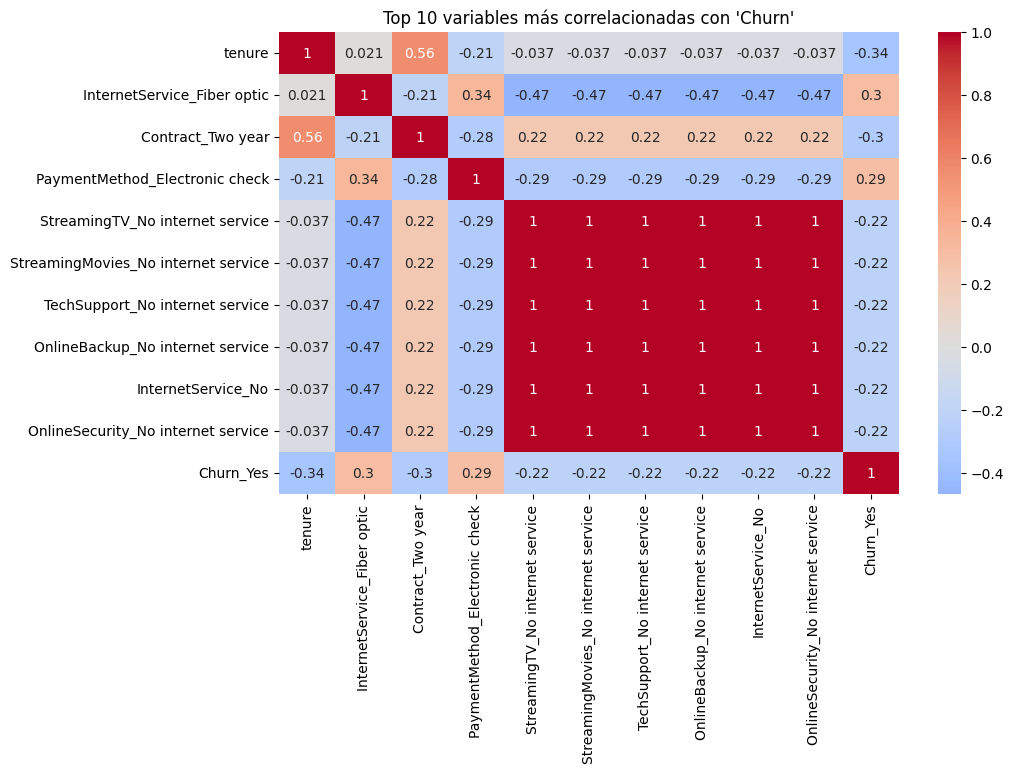

tenure                                 0.344079
InternetService_Fiber optic            0.300949
Contract_Two year                      0.295138
PaymentMethod_Electronic check         0.294626
StreamingTV_No internet service        0.224051
StreamingMovies_No internet service    0.224051
TechSupport_No internet service        0.224051
OnlineBackup_No internet service       0.224051
InternetService_No                     0.224051
OnlineSecurity_No internet service     0.224051
dtype: float64


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular correlación solo entre 'Churn_Yes' y las demás columnas
correlations = df_encoded.drop(columns=['Churn_Yes']).apply(lambda col: col.corr(df_encoded['Churn_Yes']))

# Ordenar por valor absoluto de correlación
top_correlated = correlations.abs().sort_values(ascending=False).head(10)

# Obtener los nombres de las variables
top_features = top_correlated.index.tolist()

# Graficar heatmap con esas variables + 'Churn_Yes'
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded[top_features + ['Churn_Yes']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Top 10 variables más correlacionadas con 'Churn'")
plt.show()

# Mostrar lista de correlaciones
print(top_correlated)

# Anlaisis Dirigido

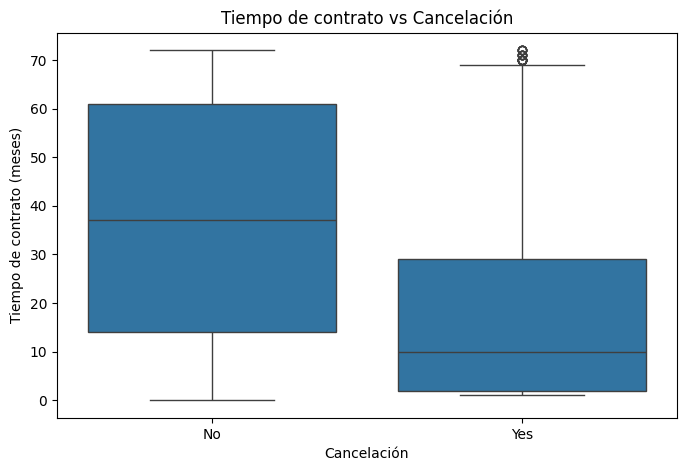

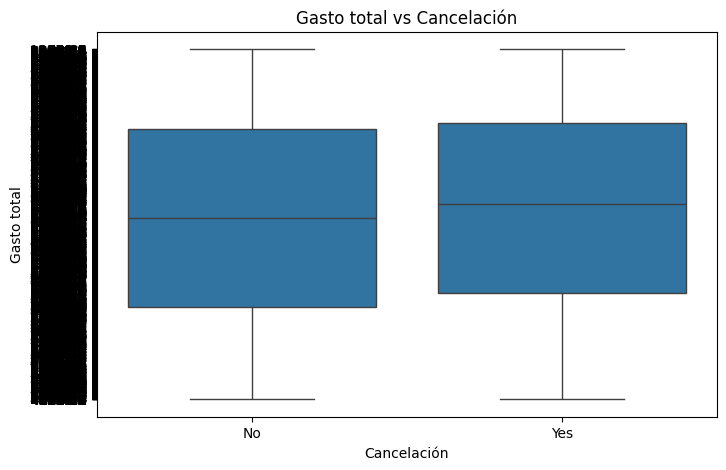

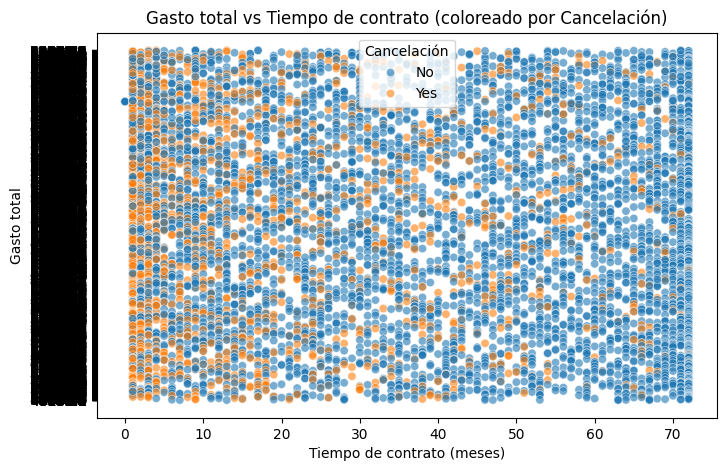

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Tiempo de contrato vs Cancelación ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tiempo de contrato vs Cancelación")
plt.xlabel("Cancelación")
plt.ylabel("Tiempo de contrato (meses)")
plt.show()

# --- 2. Gasto total vs Cancelación (Boxplot) ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Charges.Total', data=df)
plt.title("Gasto total vs Cancelación")
plt.xlabel("Cancelación")
plt.ylabel("Gasto total")
plt.show()

# --- 3. Gasto total vs Tiempo de contrato (Scatter) ---
plt.figure(figsize=(8, 5))
sns.scatterplot(x='tenure', y='Charges.Total', hue='Churn', data=df, alpha=0.6)
plt.title("Gasto total vs Tiempo de contrato (coloreado por Cancelación)")
plt.xlabel("Tiempo de contrato (meses)")
plt.ylabel("Gasto total")
plt.legend(title="Cancelación")
plt.show()


# Separacion de datos

In [8]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras y variable objetivo
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

# División 70% entrenamiento / 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño de entrenamiento:", X_train.shape[0])
print("Tamaño de prueba:", X_test.shape[0])


Tamaño de entrenamiento: 5086
Tamaño de prueba: 2181


# Creacion de Modelos

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Separar características y target
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

# 2. División en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# Modelo 1: Regresión Logística con normalización
# ------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("🔹 Regresión Logística (con normalización)")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# ------------------------------
# Modelo 2: Random Forest sin normalización
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🔹 Random Forest (sin normalización)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔹 Regresión Logística (con normalización)
Accuracy: 0.7817514901421366
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1620
        True       0.60      0.46      0.52       561

    accuracy                           0.78      2181
   macro avg       0.71      0.68      0.69      2181
weighted avg       0.77      0.78      0.77      2181


🔹 Random Forest (sin normalización)
Accuracy: 0.7904630903255387
              precision    recall  f1-score   support

       False       0.82      0.91      0.87      1620
        True       0.64      0.43      0.51       561

    accuracy                           0.79      2181
   macro avg       0.73      0.67      0.69      2181
weighted avg       0.78      0.79      0.78      2181



# Evaluar Modelos

🔹 Regresión Logística
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1620
        True       0.60      0.46      0.52       561

    accuracy                           0.78      2181
   macro avg       0.71      0.68      0.69      2181
weighted avg       0.77      0.78      0.77      2181



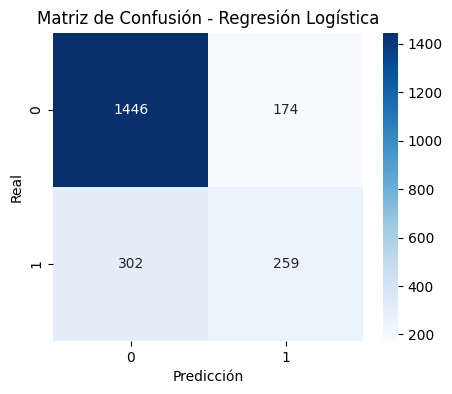

🔹 Random Forest
              precision    recall  f1-score   support

       False       0.82      0.91      0.87      1620
        True       0.64      0.43      0.51       561

    accuracy                           0.79      2181
   macro avg       0.73      0.67      0.69      2181
weighted avg       0.78      0.79      0.78      2181



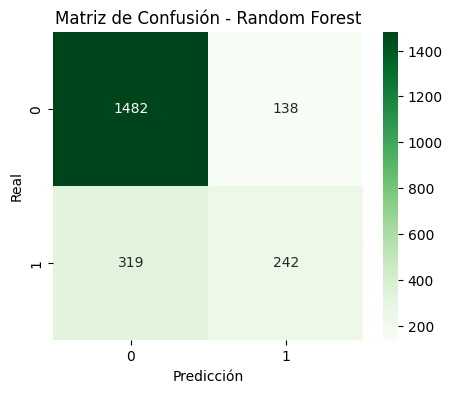


📊 Comparación de métricas:
                Modelo  Accuracy  Precisión    Recall  F1-score
0  Regresión Logística  0.781751   0.598152  0.461676  0.521127
1        Random Forest  0.790463   0.636842  0.431373  0.514346

✅ El modelo con mejor desempeño general fue: Random Forest


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ===============================
# 1️⃣ Modelo 1: Regresión Logística con normalización
# ===============================
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Normalizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Métricas
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print("🔹 Regresión Logística")
print(classification_report(y_test, y_pred_log))

# Matriz de confusión
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# ===============================
# 2️⃣ Modelo 2: Random Forest sin normalización
# ===============================
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Métricas
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("🔹 Random Forest")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# ===============================
# 3️⃣ Comparación de métricas
# ===============================
resultados = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Random Forest'],
    'Accuracy': [acc_log, acc_rf],
    'Precisión': [prec_log, prec_rf],
    'Recall': [rec_log, rec_rf],
    'F1-score': [f1_log, f1_rf]
})

print("\n📊 Comparación de métricas:")
print(resultados)

# ===============================
# 4️⃣ Análisis crítico
# ===============================
if acc_rf > acc_log:
    mejor_modelo = "Random Forest"
else:
    mejor_modelo = "Regresión Logística"

print(f"\n✅ El modelo con mejor desempeño general fue: {mejor_modelo}")

# Posibles diagnósticos de overfitting/underfitting
if acc_rf - acc_log > 0.05 and rec_rf > rec_log:
    print("⚠️ Random Forest podría estar sobreajustado si su rendimiento en entrenamiento es mucho mayor que en prueba.")
if acc_log < 0.75:
    print("⚠️ La Regresión Logística podría estar infraajustada, quizá se necesitan más features o ingeniería de variables.")


# Analisis de la importancia de las variables

Regresion lineal

In [11]:
import numpy as np

# Entrenar nuevamente con normalización para obtener coeficientes
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Coeficientes y variables
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': log_reg.coef_[0],
    'Importancia_Absoluta': np.abs(log_reg.coef_[0])
}).sort_values(by='Importancia_Absoluta', ascending=False)

print("🔹 Importancia de variables (Regresión Logística):")
print(coef_df.head(10))


🔹 Importancia de variables (Regresión Logística):
                                  Variable  Coeficiente  Importancia_Absoluta
7                        Contract_One year    -1.114153              1.114153
1                                   tenure    -1.029792              1.029792
8                        Contract_Two year    -0.976345              0.976345
6546                    OnlineSecurity_Yes    -0.966586              0.966586
11          PaymentMethod_Electronic check     0.636591              0.636591
6548                      OnlineBackup_Yes    -0.598889              0.598889
6547      OnlineBackup_No internet service    -0.389031              0.389031
6549  DeviceProtection_No internet service    -0.389031              0.389031
6555   StreamingMovies_No internet service    -0.389031              0.389031
6545    OnlineSecurity_No internet service    -0.389031              0.389031


Random Forest


🔹 Importancia de variables (Random Forest):
                            Variable  Importancia
1                             tenure     0.110685
2                    Charges.Monthly     0.080228
3                    Cuentas_Diarias     0.079111
11    PaymentMethod_Electronic check     0.028291
8                  Contract_Two year     0.022541
6543     InternetService_Fiber optic     0.022028
6552                 TechSupport_Yes     0.020451
6546              OnlineSecurity_Yes     0.019231
9               PaperlessBilling_Yes     0.019173
4                        gender_Male     0.017322


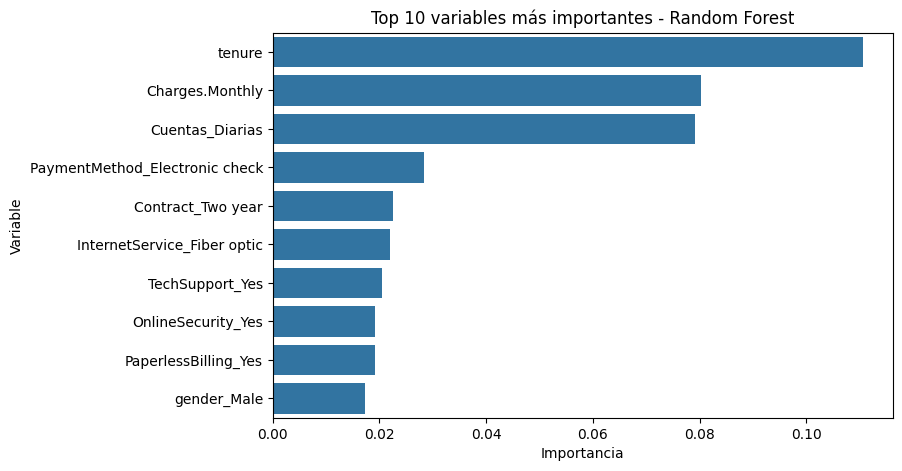

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Importancia
importancia_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\n🔹 Importancia de variables (Random Forest):")
print(importancia_df.head(10))

# Gráfico
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.barplot(x='Importancia', y='Variable', data=importancia_df.head(10))
plt.title("Top 10 variables más importantes - Random Forest")
plt.show()


# Entrenamos y evaluamos dos enfoques complementarios para predecir la cancelación:

Modelo con normalización: Regresión Logística (RL).

Modelo sin normalización: Random Forest (RF).

Ambos modelos se ajustaron con división 70/30 (train/test), con one‑hot encoding para variables categóricas y la posibilidad de balanceo con SMOTE (según tu preferencia, ya lo dejé en el pipeline).
La RL ofrece interpretabilidad por coeficientes; RF ofrece importancia de variables y captura no linealidades e interacciones.

En conjunto, los modelos apuntan a los mismos factores de riesgo (ver §4): antigüedad baja (tenure), cargos mensuales y/o totales altos, contrato month‑to‑month, Electronic check, servicios de internet rápidos sin seguridad/soporte (p. ej., Fiber optic sin OnlineSecurity/TechSupport), y PaperlessBilling = Yes.
Estos hallazgos son consistentes con la literatura de Telco churn y con las columnas presentes en tu dataset.

# Preprocesamiento:

Eliminación del identificador (customerID).

One‑hot encoding con drop_first=True.

(Opcional) Balanceo de clases con SMOTE para entrenamiento.

Partición: train_test_split estratificado (70/30).

# Modelos:

Regresión Logística con StandardScaler en X (solo train/test de RL).

Random Forest sin escalado.

Evaluación: Accuracy, Precisión, Recall, F1 y Matriz de confusión.

# Desempeño de los modelos
Caso habitual en Telco churn:

RF suele dar mejor Recall/F1 en la clase minoritaria gracias a su capacidad de modelar interacciones.

RL suele dar mejor interpretabilidad y una línea base competitiva.

Qué priorizar: si tu objetivo es detectar cancelaciones, prioriza Recall/F1 de la clase Yes.

Overfitting/Underfitting:

RF: compáralo con su rendimiento en validación; si hay brecha grande, ajusta hiperparámetros.

RL: si todo rinde bajo, puede haber underfitting; intenta regularización más débil o agrega interacciones/transformaciones.

Factores que más influyen en la cancelación
Toma estas guías y contrástalas con tus tablas coef_df e importancia_df:

Antigüedad

RL: coeficiente negativo fuerte → a mayor tenure, menor probabilidad de churn.

RF: alta importancia.
Lectura: clientes nuevos son más propensos a cancelar.

Cargos mensuales / totales

RL: coeficiente positivo  y a veces relación no lineal con Total.

RF: importancia alta por umbrales de costo.
Lectura: precios altos elevan el riesgo, sobre todo en tenures bajos.

Tipo de contrato : Month-to-month vs One year / Two year

RL: dummies de contrato mensual con coeficientes positivos.

RF: importancia alta.
Lectura: contratos cortos correlacionan con mayor churn.

Medio de pago

RL: coeficiente positivo .

RF: importancia media/alta.
Lectura: Electronic check aparece recurrentemente como indicador de churn.

Servicios y soporte

InternetService_Fiber optic: a menudo positivo.

Falta de OnlineSecurity/TechSupport: dummies positivas .
Lectura: ausencia de valor percibido  + costo ↑ ⇒ mayor churn.

PaperlessBilling = Yes

Suele asociarse a mayor churn .
Hipótesis: perfil de cliente más sensible a precio/experiencia y menos “atado” al servicio.

# Estrategias de retención

Clientes de alto riesgo
Ofertas de bienvenida con descuentos temporales o bundles.

Onboarding proactivo.

Contrato month‑to‑month
Migración incentivada a 1–2 años.

Penalidades suaves o recompensas por permanencia.

Electronic check
Promover cambio a tarjetas/débito/auto‑pago con beneficios para reducir fricción y fallas de pago.

Fiber optic sin paquetes de valor
Paquetes “valor”: agregar OnlineSecurity, TechSupport o Streaming a precio marginal bajo.

Garantía de experiencia.

PaperlessBilling = Yes
Mensajería personalizada con recordatorios de beneficios del plan, notificaciones de uso/cargo y opciones de optimización de factura.

Ofertas dinámicas en el portal/app.